In [1]:
!pip install -e .

Obtaining file:///C:/Users/%D0%9E%D0%BB%D1%8C%D0%B3%D0%B0/%D0%92%D0%9A%D0%A0%20%D0%9A%D0%B0%D1%80%D0%BF%D0%B5%D0%BD%D0%BA%D0%BE/project
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for market-analyzer


Please enter your phone (or bot token): +79966765780
Please enter the code you received: 66839
Signed in successfully as Родион Карпенко; remember to not break the ToS or you will risk an account ban!


C:\Users\Ольга\ВКР Карпенко\project\market_analyzer\detect_signal.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_clean['Signal'] = preds


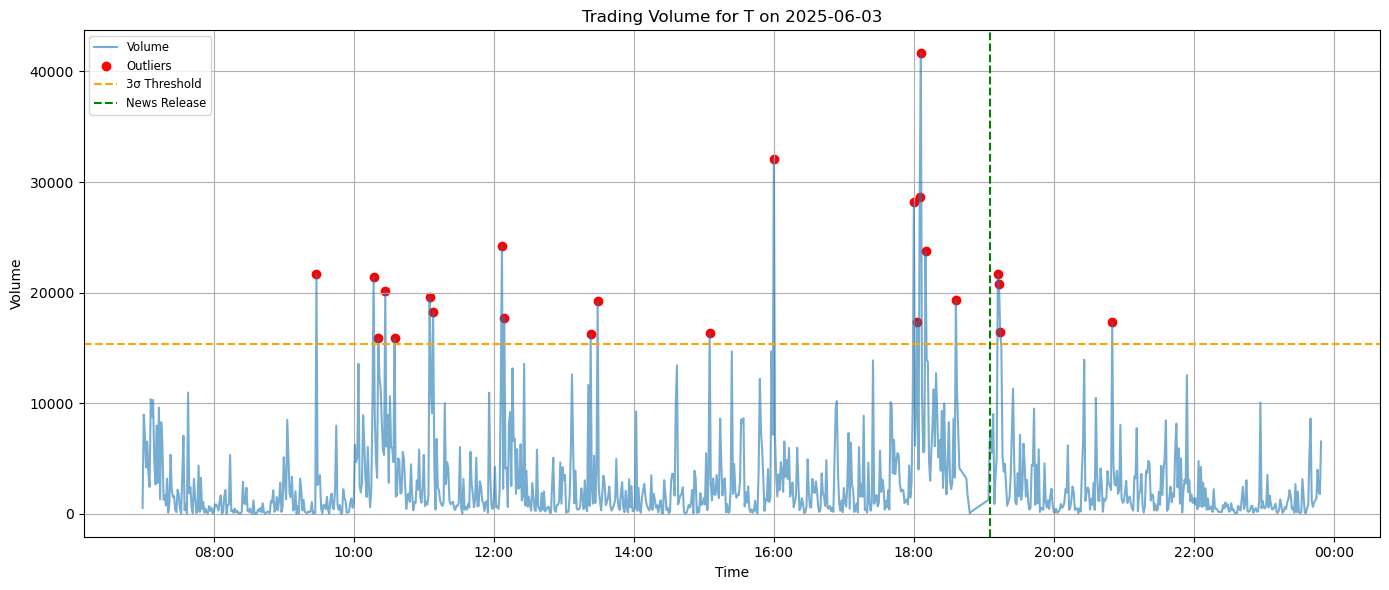

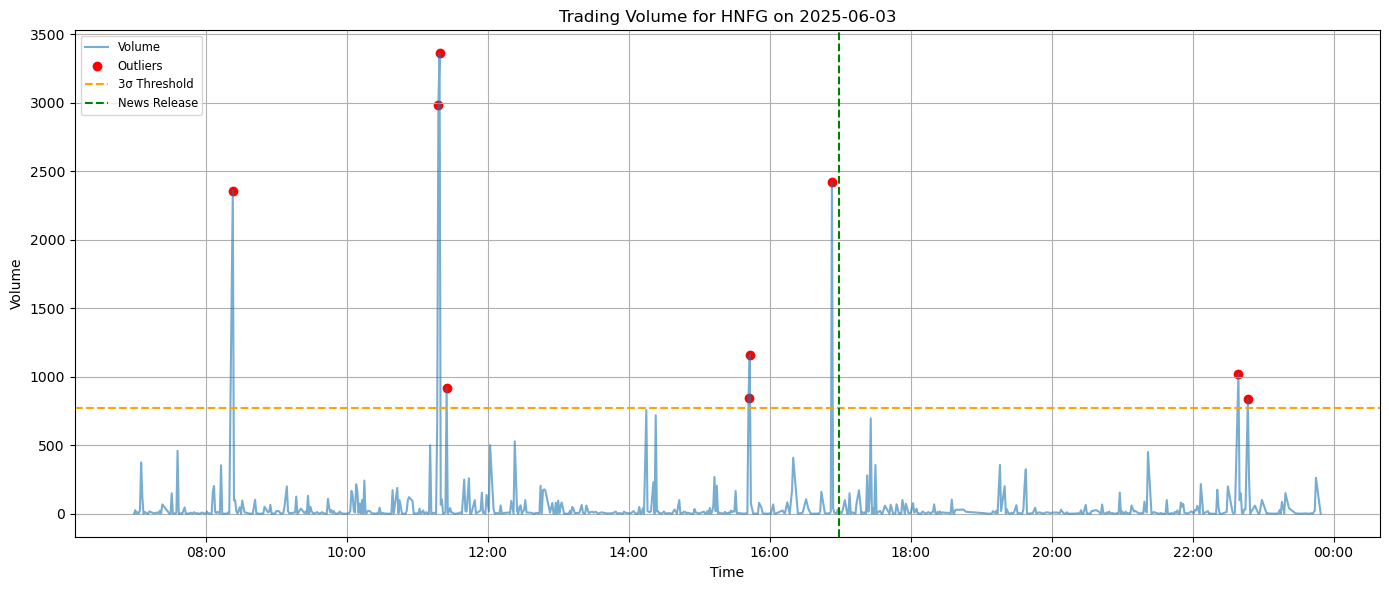

,Timestamp,Ticker,NewsTime
0,2025-06-03 09:28:00,T,2025-06-03 19:05:23
1,2025-06-03 10:17:00,T,2025-06-03 19:05:23
2,2025-06-03 10:21:00,T,2025-06-03 19:05:23
3,2025-06-03 10:27:00,T,2025-06-03 19:05:23
4,2025-06-03 10:35:00,T,2025-06-03 19:05:23


In [2]:
from market_analyzer import extract_news, load_vectorizer, load_model, detect_signals, detect_tickers, match_all_news

import asyncio
import nest_asyncio
nest_asyncio.apply()

async def pipeline():
    df_news = await extract_news()
    vectorizer = load_vectorizer()
    model = load_model()
    df_signals = detect_signals(df_news, vectorizer, model)
    df_enriched = detect_tickers(df_signals)
    df_anomalies = match_all_news(df_enriched)
    df_anomalies.to_excel("anomalies_before_news.xlsx", index=False)
    return df_anomalies

df_result = asyncio.run(pipeline())
df_result.head()

In [3]:
df_result

,Timestamp,Ticker,NewsTime
0,2025-06-03 09:28:00,T,2025-06-03 19:05:23
1,2025-06-03 10:17:00,T,2025-06-03 19:05:23
2,2025-06-03 10:21:00,T,2025-06-03 19:05:23
3,2025-06-03 10:27:00,T,2025-06-03 19:05:23
4,2025-06-03 10:35:00,T,2025-06-03 19:05:23
5,2025-06-03 11:05:00,T,2025-06-03 19:05:23
6,2025-06-03 11:08:00,T,2025-06-03 19:05:23
7,2025-06-03 12:07:00,T,2025-06-03 19:05:23
8,2025-06-03 12:09:00,T,2025-06-03 19:05:23
9,2025-06-03 13:23:00,T,2025-06-03 19:05:23
